In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

In [2]:
label_modularity = "NewClass"

In [3]:
train_filename = 'FinalDataset/polished_dataset_94_20000_limited_texts_down_2000.csv'
train_data = pd.read_csv(train_filename)

In [4]:
#Count labels and empty texts
num_labels = num_unique_labels = train_data[label_modularity].nunique()
print("NUM LABELS")
print(num_labels)
empty_text_count = (train_data['Text'] == '').sum()
print("EMPTY TEXTS")
print(empty_text_count)
num_rows = train_data.shape[0]
print("NUM TEXTS")
print(num_rows)
all_text = ' '.join(train_data['Text'].values)
num_words = len(all_text.split())
print("NUM WORDS")
print(num_words)

NUM LABELS
23
EMPTY TEXTS
0
NUM TEXTS
233442


In [ ]:
#Calculate Z
z = num_texts / (num_words/num_texts)
print(z)

In [5]:
#Count texts of each category
category_counts = train_data[label_modularity].value_counts()
print("Número de textos por categoría:")
pd.set_option('display.max_rows', None)
total_count = category_counts.sum()
print(category_counts)
pd.reset_option('display.max_rows')

Número de textos por categoría:
NewClass
Organisation              20000
MusicalWork               20000
PopulatedPlace            20000
Person                    20000
ArchitecturalStructure    20000
Eukaryote                 20000
Film                      20000
WrittenWork               12980
NaturalPlace              12005
SocietalEvent             11533
TelevisionShow             9636
CelestialBody              8874
Software                   8499
Species                    5874
OlympicResult              4003
TelevisionEpisode          3415
Disease                    2793
Artwork                    2687
MeanOfTransportation       2455
Ship                       2388
Park                       2130
Aircraft                   2094
WorldHeritageSite          2076
Name: count, dtype: int64


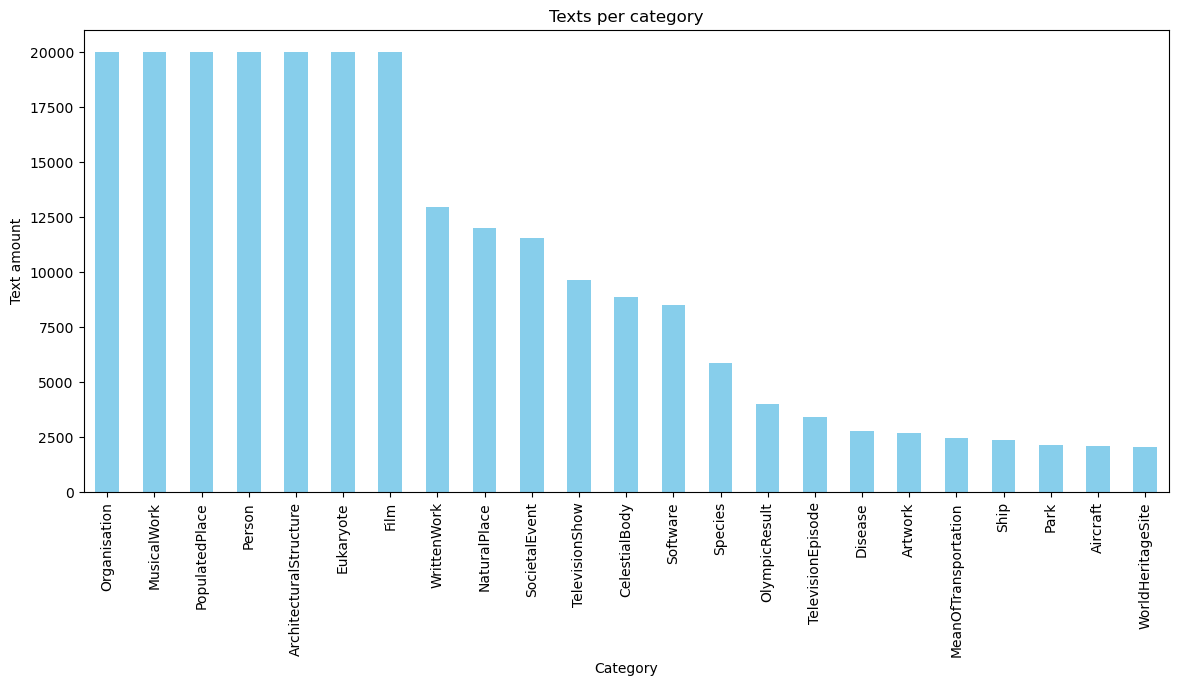

In [6]:
#Plot text amounts
plt.figure(figsize=(14, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Texts per category')
plt.xlabel('Category')
plt.ylabel('Text amount')
plt.xticks(rotation=90)
plt.show()

In [7]:
#Find the shortest and largest text
min_length = train_data['Text'].apply(len).min()
max_length = train_data['Text'].apply(len).max()
print(f"Longitud del texto más corto: {min_length} caracteres")
print(f"Longitud del texto más largo: {max_length} caracteres")

Longitud del texto más corto: 1 caracteres
Longitud del texto más largo: 39518 caracteres


In [8]:
#Find the class with more text and the class with less

# Crear un diccionario para almacenar los conteos de palabras por categoría
word_counts_by_category = {}

# Iterar sobre cada fila del DataFrame
for index, row in train_data.iterrows():
    text = row['Text']
    category = row[label_modularity]
    
    # Tokenizar el texto en palabras (asumiendo palabras separadas por espacios)
    words = re.findall(r'\w+', str(text).lower())  # Obtener todas las palabras en minúsculas
    
    # Contar las palabras en este texto
    word_count = len(words)  # Contar solo el número de palabras en el texto
    
    # Actualizar el diccionario de conteos por categoría
    if category in word_counts_by_category:
        word_counts_by_category[category] += word_count
    else:
        word_counts_by_category[category] = word_count

# Crear una lista de tuplas (categoria, total de palabras) para ordenar
category_word_counts = [(category, total_words) for category, total_words in word_counts_by_category.items()]

# Ordenar la lista de tuplas por el total de palabras (segundo elemento de la tupla)
category_word_counts_sorted = sorted(category_word_counts, key=lambda x: x[1], reverse=True)

# Mostrar los resultados de conteo por categoría ordenados de menor a mayor
for category, total_words in category_word_counts_sorted:
    print(f'Categoría: {category}, Total de palabras: {total_words}')

Categoría: MusicalWork, Total de palabras: 1970143
Categoría: Organisation, Total de palabras: 1924356
Categoría: ArchitecturalStructure, Total de palabras: 1908962
Categoría: Person, Total de palabras: 1546935
Categoría: Film, Total de palabras: 1409346
Categoría: SocietalEvent, Total de palabras: 1358351
Categoría: NaturalPlace, Total de palabras: 1324311
Categoría: WrittenWork, Total de palabras: 1199939
Categoría: PopulatedPlace, Total de palabras: 1023872
Categoría: TelevisionShow, Total de palabras: 1005785
Categoría: Software, Total de palabras: 965147
Categoría: Eukaryote, Total de palabras: 638552
Categoría: CelestialBody, Total de palabras: 399324
Categoría: Artwork, Total de palabras: 365833
Categoría: Disease, Total de palabras: 337663
Categoría: WorldHeritageSite, Total de palabras: 325372
Categoría: Species, Total de palabras: 272728
Categoría: TelevisionEpisode, Total de palabras: 268186
Categoría: MeanOfTransportation, Total de palabras: 203217
Categoría: OlympicResult,

In [9]:
suma = sum(word_counts_by_category.values())

print("La suma de todas las palabras es:", suma)

La suma de todas las palabras es: 19193372


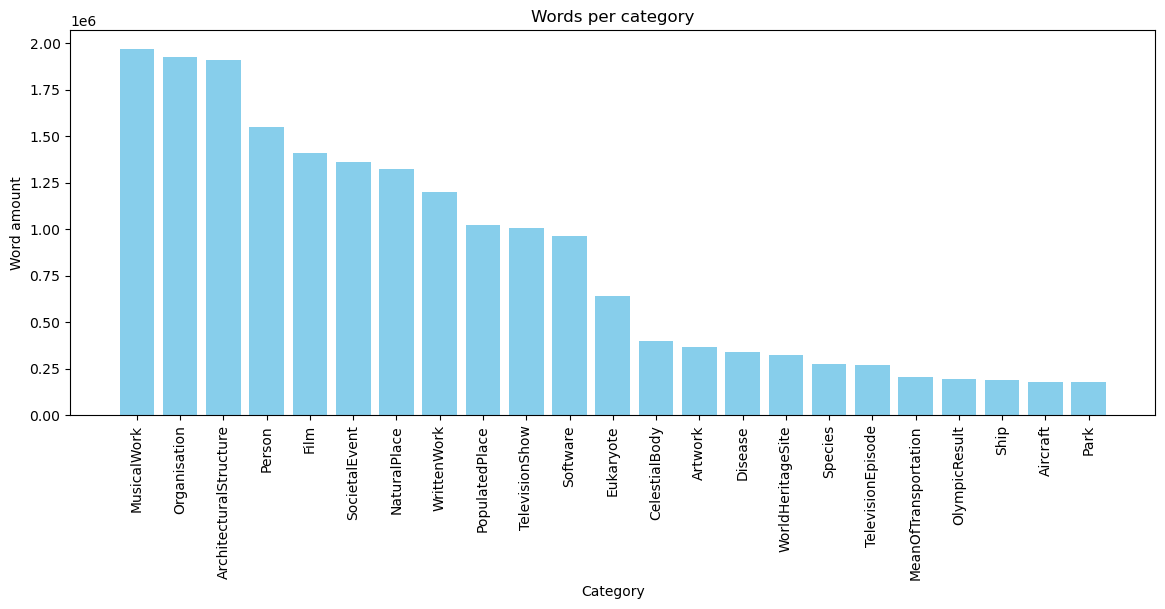

In [10]:
#Plot text amounts

words = [item[0] for item in category_word_counts_sorted]
values = [item[1] for item in category_word_counts_sorted]

plt.figure(figsize=(14, 5))
plt.bar(words, values, color='skyblue')
plt.title('Words per category')
plt.xlabel('Category')
plt.ylabel('Word amount')
plt.xticks(rotation=90)
plt.show()

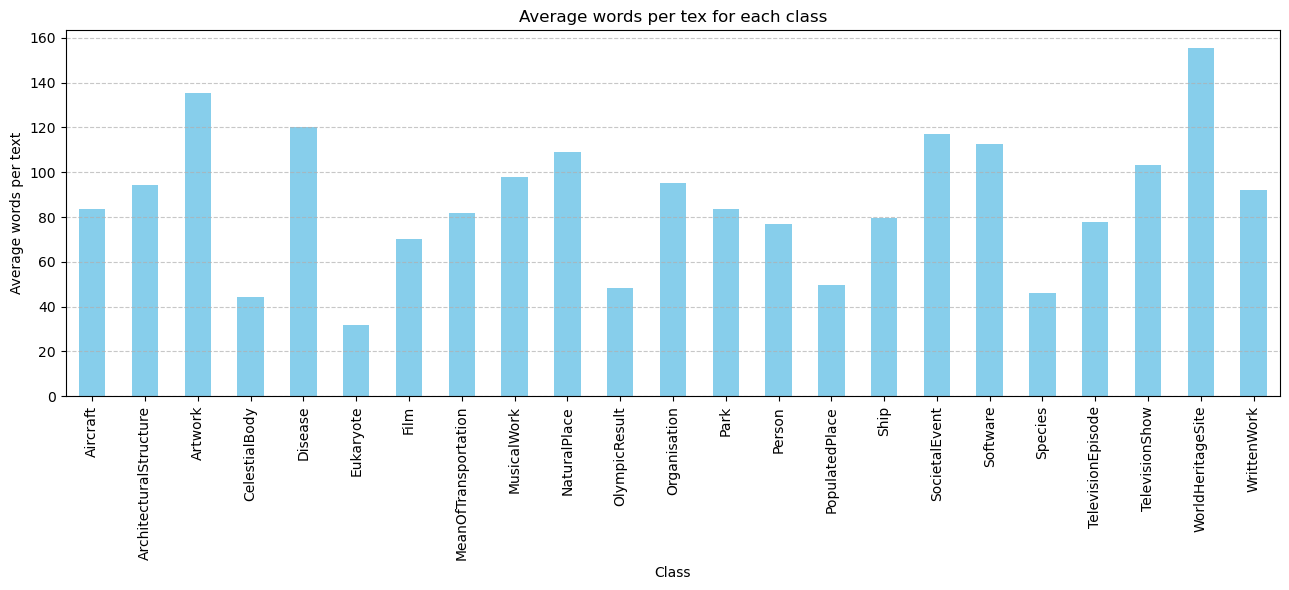

In [11]:
#Average words per text for every class
train_data['word_count'] = train_data['Text'].apply(lambda x: len(x.split()))
mean_word_count_per_class = train_data.groupby('NewClass')['word_count'].mean()

plt.figure(figsize=(13, 6))
mean_word_count_per_class.plot(kind='bar', color='skyblue')
plt.title('Average words per tex for each class')
plt.xlabel('Class')
plt.ylabel('Average words per text')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()